We’ll use Game of Thrones as
an example, the episode list for which can be found at <a>http://www.imdb.com/title/
tt0944947/episodes</a>.

In [1]:
import requests
from bs4 import BeautifulSoup
url='http://www.imdb.com/title/tt0944947/episodes'
episodes = []
ratings = []
# Go over seasons 1 to 7
for season in range(1, 8):
    r = requests.get(url, params={'season': season})
    soup = BeautifulSoup(r.text, 'html.parser')
    listing = soup.find('div', class_='eplist')
    for epnr, div in enumerate(listing.find_all('div', recursive=False)): #recusive set to False means only look for direct children
        episode = "{}.{}".format(season, epnr + 1)
        rating_el = div.find(class_='ipl-rating-star__rating')
        rating = float(rating_el.get_text(strip=True))
        print('Episode:', episode, '-- rating:', rating)
        episodes.append(episode)
        ratings.append(rating)  

Episode: 1.1 -- rating: 8.9
Episode: 1.2 -- rating: 8.6
Episode: 1.3 -- rating: 8.5
Episode: 1.4 -- rating: 8.6
Episode: 1.5 -- rating: 9.0
Episode: 1.6 -- rating: 9.1
Episode: 1.7 -- rating: 9.1
Episode: 1.8 -- rating: 8.9
Episode: 1.9 -- rating: 9.6
Episode: 1.10 -- rating: 9.4
Episode: 2.1 -- rating: 8.6
Episode: 2.2 -- rating: 8.4
Episode: 2.3 -- rating: 8.7
Episode: 2.4 -- rating: 8.6
Episode: 2.5 -- rating: 8.6
Episode: 2.6 -- rating: 8.9
Episode: 2.7 -- rating: 8.8
Episode: 2.8 -- rating: 8.6
Episode: 2.9 -- rating: 9.6
Episode: 2.10 -- rating: 9.3
Episode: 3.1 -- rating: 8.6
Episode: 3.2 -- rating: 8.5
Episode: 3.3 -- rating: 8.7
Episode: 3.4 -- rating: 9.5
Episode: 3.5 -- rating: 8.9
Episode: 3.6 -- rating: 8.7
Episode: 3.7 -- rating: 8.6
Episode: 3.8 -- rating: 8.9
Episode: 3.9 -- rating: 9.9
Episode: 3.10 -- rating: 9.0
Episode: 4.1 -- rating: 9.0
Episode: 4.2 -- rating: 9.7
Episode: 4.3 -- rating: 8.7
Episode: 4.4 -- rating: 8.7
Episode: 4.5 -- rating: 8.6
Episode: 4.6 -- r

In [5]:
print(episodes)
# str='1.1'
# print(str.split('.')[1])

['1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '1.10', '2.1', '2.2', '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '2.10', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '3.10', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '4.10', '5.1', '5.2', '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '5.10', '6.1', '6.2', '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '6.10', '7.1', '7.2', '7.3', '7.4', '7.5', '7.6', '7.7']
1


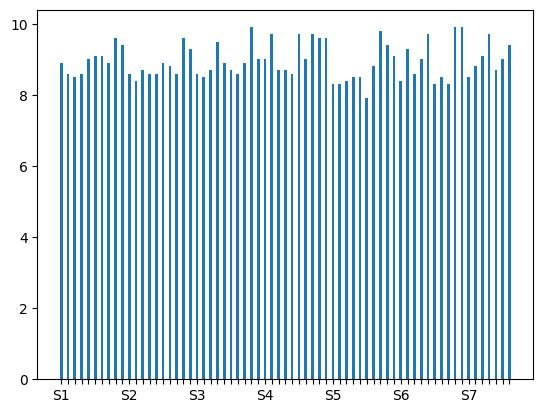

In [6]:
import matplotlib.pyplot as plt
episodes = ['S' + e.split('.')[0] if int(e.split('.')[1]) == 1 else '' for e in episodes]
plt.figure()
positions = [a*2 for a in range(len(ratings))]
plt.bar(positions, ratings, align='center')
plt.xticks(positions, episodes)
plt.show()